AIM: To apply a simple linear regression on fish quality dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Fish[1].csv')
display(df.head())

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:

print("Missing values before cleaning:")
print(df.isnull().sum())




Missing values before cleaning:
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df[['Length1']]
y = df['Weight']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient (Length1): {model.coef_[0]:.2f}")

Intercept: -464.13
Coefficient (Length1): 32.44


In [ ]:
X_len2 = df[['Length2']]
y_len2 = df['Weight']

In [ ]:
X_train_len2, X_test_len2, y_train_len2, y_test_len2 = train_test_split(X_len2, y_len2, test_size=0.2, random_state=42)

In [ ]:
model_len2 = LinearRegression()
model_len2.fit(X_train_len2, y_train_len2)
print(f"Intercept (Length2 model): {model_len2.intercept_:.2f}")
print(f"Coefficient (Length2): {model_len2.coef_[0]:.2f}")

Intercept (Length2 model): -477.31
Coefficient (Length2): 30.43


In [ ]:
y_pred_len2 = model_len2.predict(X_test_len2)

mae_len2 = mean_absolute_error(y_test_len2, y_pred_len2)
mse_len2 = mean_squared_error(y_test_len2, y_pred_len2)
rmse_len2 = np.sqrt(mse_len2)
r2_len2 = r2_score(y_test_len2, y_pred_len2)

print(f"\nEvaluation Metrics for Length2 Model:")
print(f"Mean Absolute Error (MAE): {mae_len2:.2f}")
print(f"Mean Squared Error (MSE): {mse_len2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_len2:.2f}")
print(f"R-squared (R2): {r2_len2:.2f}")


Evaluation Metrics for Length2 Model:
Mean Absolute Error (MAE): 128.85
Mean Squared Error (MSE): 25604.52
Root Mean Squared Error (RMSE): 160.01
R-squared (R2): 0.82


In [ ]:
X_len3 = df[['Length3']]
y_len3 = df['Weight']

In [ ]:
X_train_len3, X_test_len3, y_train_len3, y_test_len3 = train_test_split(X_len3, y_len3, test_size=0.2, random_state=42)

In [ ]:
model_len3 = LinearRegression()
model_len3.fit(X_train_len3, y_train_len3)
print(f"Intercept (Length3 model): {model_len3.intercept_:.2f}")
print(f"Coefficient (Length3): {model_len3.coef_[0]:.2f}")

Intercept (Length3 model): -495.48
Coefficient (Length3): 28.32


In [ ]:
y_pred_len3 = model_len3.predict(X_test_len3)

mae_len3 = mean_absolute_error(y_test_len3, y_pred_len3)
mse_len3 = mean_squared_error(y_test_len3, y_pred_len3)
rmse_len3 = np.sqrt(mse_len3)
r2_len3 = r2_score(y_test_len3, y_pred_len3)

print(f"\nEvaluation Metrics for Length3 Model:")
print(f"Mean Absolute Error (MAE): {mae_len3:.2f}")
print(f"Mean Squared Error (MSE): {mse_len3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_len3:.2f}")
print(f"R-squared (R2): {r2_len3:.2f}")


Evaluation Metrics for Length3 Model:
Mean Absolute Error (MAE): 114.93
Mean Squared Error (MSE): 21835.27
Root Mean Squared Error (RMSE): 147.77
R-squared (R2): 0.85


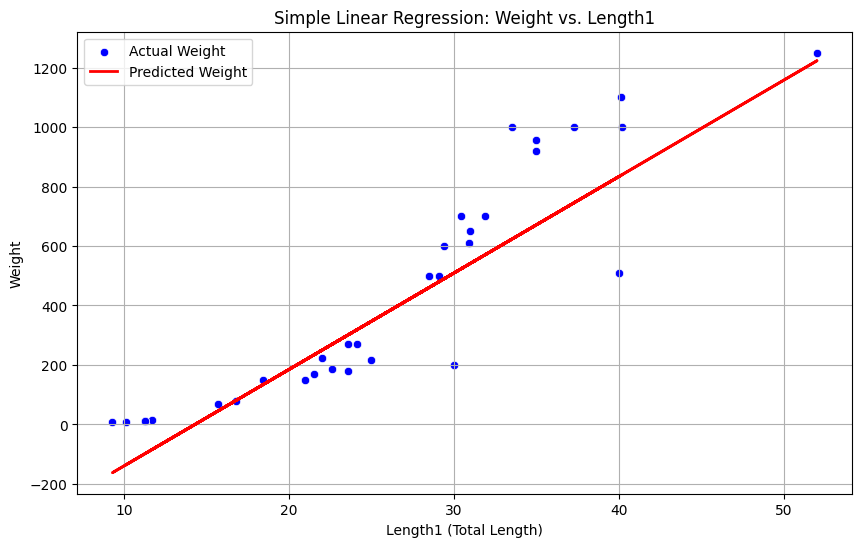

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Length1'], y=y_test, color='blue', label='Actual Weight')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Weight')
plt.title('Simple Linear Regression: Weight vs. Length1')
plt.xlabel('Length1 (Total Length)')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()

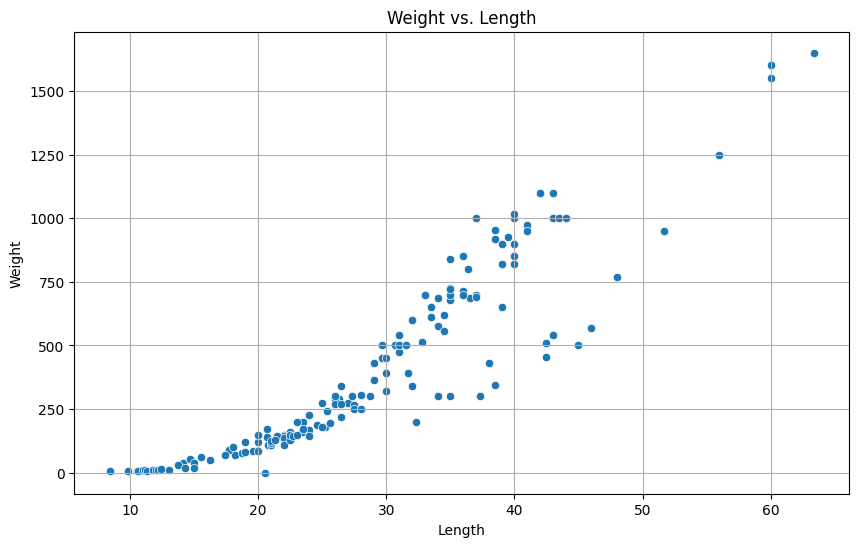

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length2', y='Weight', data=df)
plt.title('Weight vs. Length')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

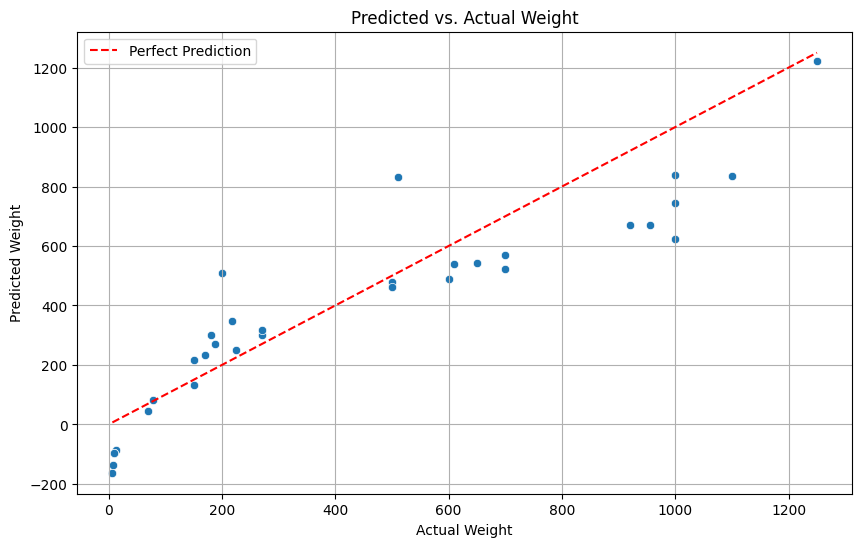

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.title('Predicted vs. Actual Weight')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.legend()
plt.grid(True)
plt.show()

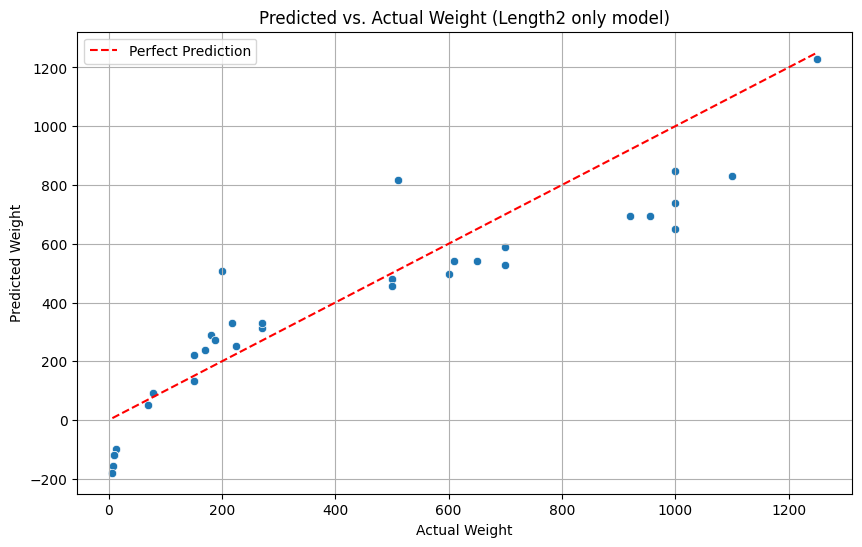

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_len2, y=y_pred_len2)
plt.plot([y_test_len2.min(), y_test_len2.max()], [y_test_len2.min(), y_test_len2.max()], 'r--', label='Perfect Prediction')
plt.title('Predicted vs. Actual Weight (Length2 only model)')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.legend()
plt.grid(True)
plt.show()

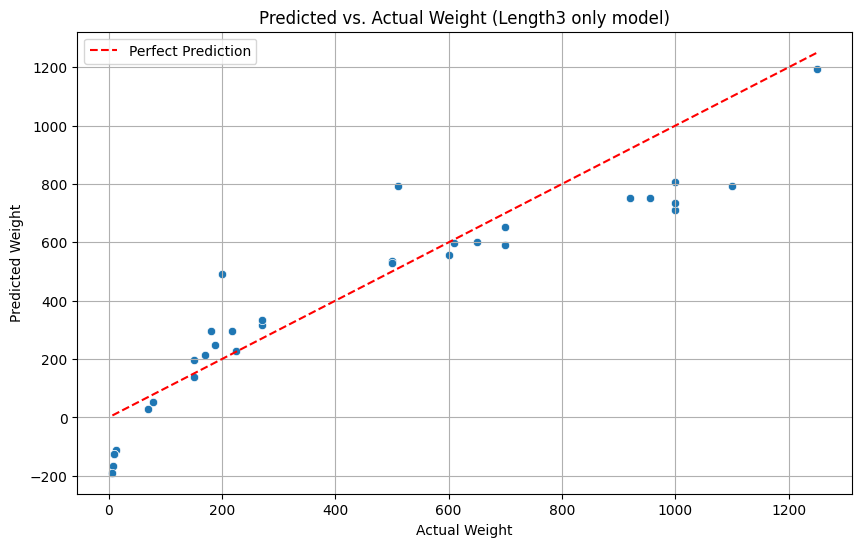

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_len3, y=y_pred_len3)
plt.plot([y_test_len3.min(), y_test_len3.max()], [y_test_len3.min(), y_test_len3.max()], 'r--', label='Perfect Prediction')
plt.title('Predicted vs. Actual Weight (Length3 only model)')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.legend()
plt.grid(True)
plt.show()

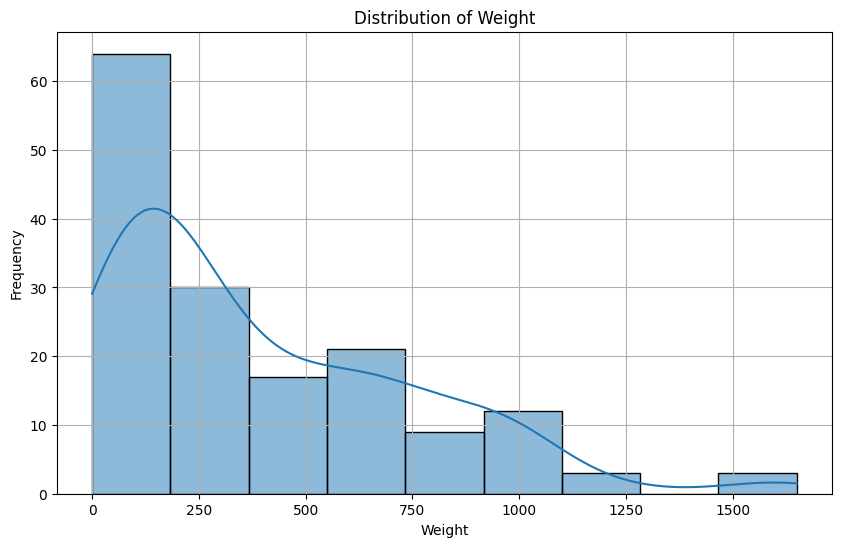

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

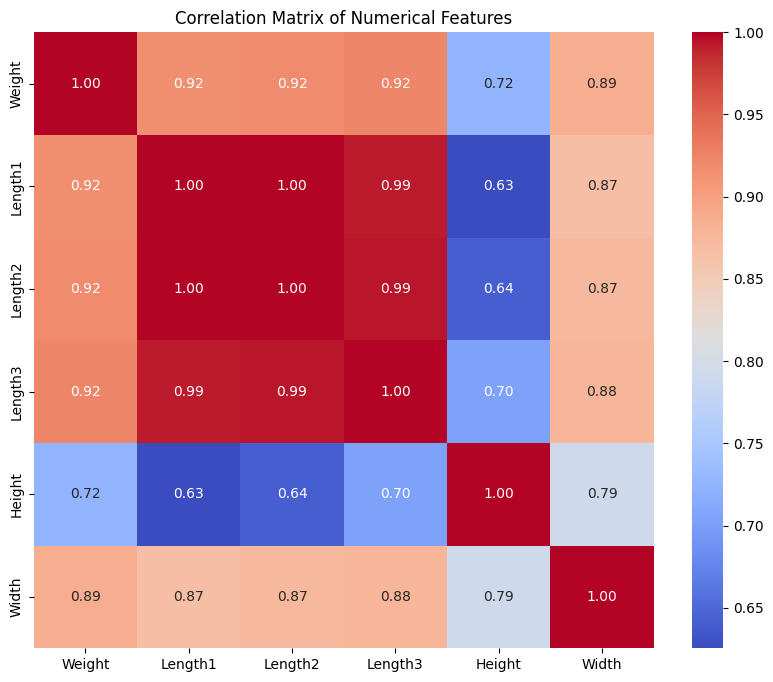

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
comparison_data = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Model (Length1 Only)': [mae, mse, rmse, r2],
    'Model (Length2 Only)': [mae_len2, mse_len2, rmse_len2, r2_len2],
    'Model (Length3 Only)': [mae_len3, mse_len3, rmse_len3, r2_len3],
}

comparison_df_all = pd.DataFrame(comparison_data)
display(comparison_df_all.round(2))

,Metric,Model (Length1 Only),Model (Length2 Only),Model (Length3 Only)
0,MAE,129.37,128.85,114.93
1,MSE,26796.68,25604.52,21835.27
2,RMSE,163.70,160.01,147.77
3,R2,0.81,0.82,0.85


# Insights/Observations

1. Data is clean with no missing values.

2. Strong Relationship between length and weight

3. Correlation heatmap showed a very strong positive correlation betweenn weight and all length.

4. The correlation heatmap clearly showed a very strong positive correlation between 'Weight' and all 'Length' variables ('Length1', 'Length2', 'Length3'). This is a fundamental observation: as fish length increases, their weight tends to increase proportionally.
The lengths themselves ('Length1', 'Length2', 'Length3') are also highly correlated with each other, as expected.

5. All length features are strong predictors of fish weight, as evidenced by the high R-squared values (around 0.81 to 0.85) in our linear regression models.

6. When comparing models using single length features, the model built with 'Length3 Only' consistently demonstrated the best performance across all metrics:
It achieved the highest R-squared (0.85), meaning it explains 85% of the variance in 'Weight'.
It had the lowest MAE (114.93), MSE (21835.27), and RMSE (147.77), indicating the most accurate predictions with the smallest average error.

7. The 'Predicted vs. Actual Weight' plots for all models showed points generally clustering along the ideal y=x line, confirming that linear regression is a suitable approach for this dataset, with the 'Length3' and combined 'Length2' & 'Length3' models showing the tightest clusters.

# Conclusion:

Our analysis consistently shows that fish length is a highly reliable and powerful indicator for predicting fish weight. Specifically, 'Length3' (cross length) appears to be the most critical single dimension for this prediction task in the given dataset. While incorporating additional length features like 'Length2' can contribute, 'Length3' alone provides a remarkably accurate and efficient model.

This robust relationship could be valuable for various applications, such as estimating fish biomass from length measurements without needing to weigh individual fish, which could be useful in ecological studies or fisheries management.